# Get cocrystalized molecules from PDB

- Extract the cocrystalized molecules from the PDB structures.
- The active site is defined by a reference PDB structure and the name of the cocrystalized molecule (3-letter identifier code).

In [1]:
import pandas as pd
import numpy as np
from glob import glob
import itertools
from pathlib import Path
from prody import parsePDB
import sys
sys.path.insert(0, '../..')
from helper_modules.get_cocristalized_ligands \
     import get_pocket_ligand, PocketResidues

- Load the table containing the PDBs metadata.

In [2]:
prot_name  = 'hsp90'

In [3]:
path_df_file = glob(f"./TABLA_MTDATA_{prot_name.upper()}_*_crys.json")[0]
df_prot      = pd.read_json(path_df_file)
df_prot.index.name = 'PDB_ID'
df_prot.head(2)

,Title,Date,Entities,ChainID,Resolution,Identity,Coverage,NumGaps,GapLen,GapPos,NumLigs,NameLigs
PDB_ID,,,,,,,,,,,,
1byq,in vivo function of hsp90 is dependent on atp ...,1998-10-28,1,A,1.50,1.0,29.098,2,"[10, 509]","[[1, 10], [224, 732]]",2,"[ADP, MG]"
1osf,crystal structure and molecular modeling of 17...,2003-05-27,1,A,1.75,1.0,29.372,2,"[8, 509]","[[1, 8], [224, 732]]",3,"[KOS, ACY, MPD]"


- How many PDB entries have a cocristalized molecule?

In [4]:
df_prot_ligs = df_prot[df_prot.NumLigs > 0]
print(F'{len(df_prot_ligs)} of {len(df_prot)} structures have at least one HETATM molecule.')

291 of 298 structures have at least one HETATM molecule.


- How many different small molecules (HETAMT) are there?

In [5]:
# How many cocrystalized molecules are there?
# A set of all HETATM molecules
lig_full_list = list( itertools.chain.from_iterable( df_prot.NameLigs ) )
print(f'There are a total of {len(lig_full_list)}', 
       'HETATM molecules (duplicates included).')

lig_all_list = list(set(lig_full_list))
print(f'There are {len(lig_all_list)} unique', 
       'HETATM molecules (without duplicates).')

There are a total of 385 HETATM molecules (duplicates included).
There are 266 unique HETATM molecules (without duplicates).


### Visualize the pocket residues

In [6]:
# Use a reference structure to visualize the pocket residues
ref_struc_id    = '1uyg'
ref_ligand_name = 'PU2'

In [7]:
pkt_info = PocketResidues(ref_struc_id, ref_ligand_name)
pocket_residues_str = pkt_info.get_pocket_residues_as_list()
print('Indices of pocket redsidues:', pocket_residues_str)

Indices of pocket redsidues: 22 26 47 48 50 51 52 53 54 55 56 58 91 93 95 96 97 98 99 102 103 107 108 110 111 135 136 137 138 139 148 149 150 152 153 154 162 163 183 184 185 186


In [8]:
view = pkt_info.visualize_pocket()
view

NGLWidget()

In [11]:
view.render_image()

Image(value=b'', width='99%')

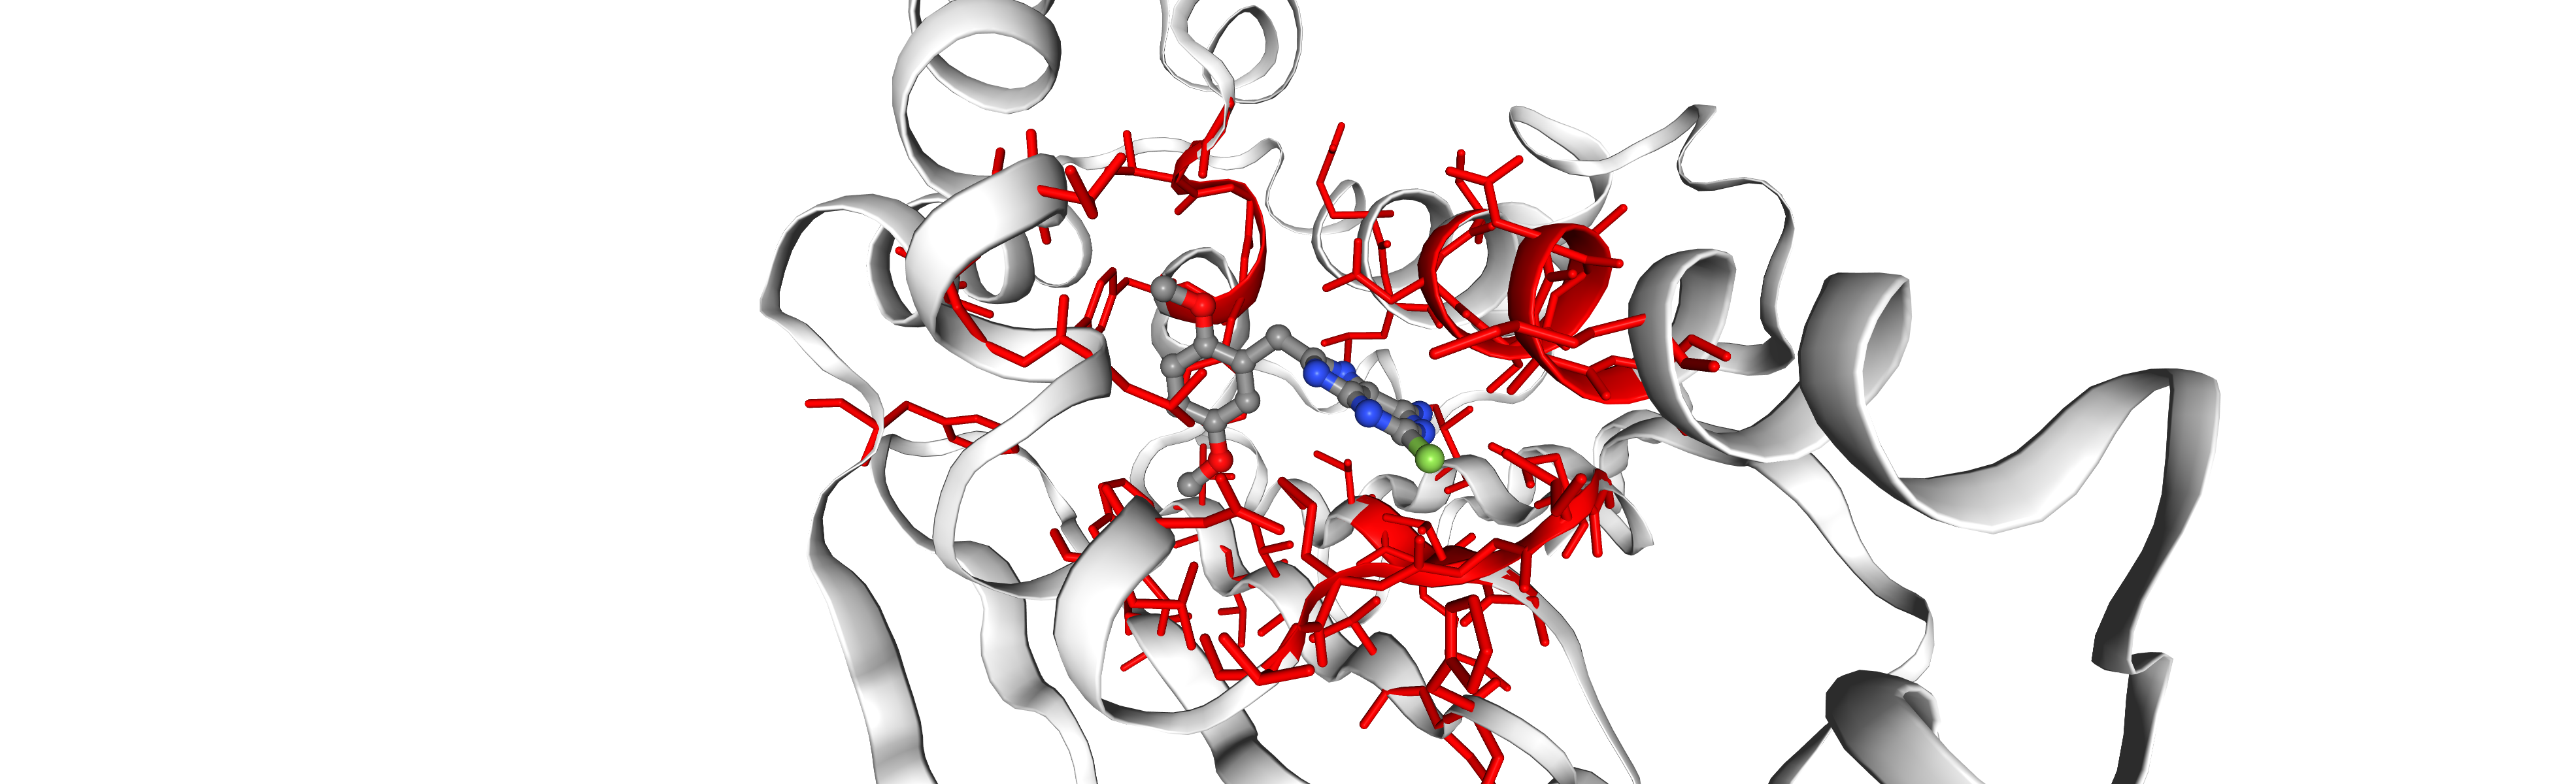

In [12]:
view._display_image()

## Carry out the Analysis
- Define the input files and the output directory.

In [11]:
# Define the output directories
OUT_MAIN          = './pdb_structures'
IN_DIR_ENSEMBLE   = f'{OUT_MAIN}/pdb_prepared'
IN_DIR_RAW_LIGS   = f'{OUT_MAIN}/raw_ligands'
OUT_DIR_PREP_LIGS = f'{OUT_MAIN}/pocket_ligands'

# Create the output directory if it doesnt exists
Path(OUT_DIR_PREP_LIGS).mkdir(parents = True, exist_ok = True)

- Update the main Dataframe with ligands information
 - Inhib: Name of the molecule found inside the pocket.
 - Inhib_mass: Molecular weight of the found molecule.
Save the updated dataframe:

In [12]:
# We will add two new columns to the dataframe
df_prot["Inhib"] = ""
df_prot["Inhib_mass"] = np.nan

# Get all pocket ligands
for pdb_id in df_prot.index:
    inhibidor = get_pocket_ligand(
                        pdb_id = pdb_id, 
                        pocket_residues = pocket_residues_str,
                        raw_lig_dir     = IN_DIR_RAW_LIGS,
                        prot_chain_dir  = IN_DIR_ENSEMBLE,
                        pk_ligs_dir = OUT_DIR_PREP_LIGS,
                        write_files = True, 
                        cutoff      = 8,
        # Min weight increased as DEKOIS and DUD molecules
        # for the HSP90 have bigger MW
                        min_weight  = 250
                 )

    df_prot.at[str(pdb_id), 'Inhib'] = inhibidor[0]
    df_prot.at[pdb_id, 'Inhib_mass'] = inhibidor[1]
print('...')

Protein 1byq:
   Molecules found: ['ADP' 'HOH'] -> ligand ADP saved.
Protein 1osf:
   Molecules found: ['ACY' 'HOH' 'KOS' 'MPD'] -> ligand KOS saved.
Protein 1uy6:
   Molecules found: ['HOH' 'PU3'] -> ligand PU3 saved.
Protein 1uy7:
   Molecules found: ['HOH' 'PU4'] -> ligand PU4 saved.
Protein 1uy8:
   Molecules found: ['HOH' 'PU5'] -> ligand PU5 saved.
Protein 1uy9:
   Molecules found: ['HOH' 'PU6'] -> ligand PU6 saved.
Protein 1uyc:
   Molecules found: ['HOH' 'PU7'] -> ligand PU7 saved.
Protein 1uyd:
   Molecules found: ['HOH' 'PU8'] -> ligand PU8 saved.
Protein 1uye:
   Molecules found: ['HOH' 'PU9'] -> ligand PU9 saved.
Protein 1uyf:
   Molecules found: ['HOH' 'PU1'] -> ligand PU1 saved.
Protein 1uyg:
   Molecules found: ['HOH' 'PU2'] -> ligand PU2 saved.
Protein 1uyh:
   Molecules found: ['HOH' 'PU0'] -> ligand PU0 saved.
Protein 1uyi:
   Molecules found: ['HOH' 'PUZ'] -> ligand PUZ saved.
Protein 1uyk:
   Molecules found: ['HOH' 'PUX'] -> ligand PUX saved.
The model 1uyl HAS NO 

AttributeError: 'NoneType' object has no attribute 'select'

### Updated Dataframe

In [ ]:
n = df_prot.shape[0]
file = f'TABLA_MTDATA_{prot_name.upper()}_{n}_crys_LIGS_INFO.json'
if Path(file).exists():
    df_prot = pd.read_json(file)
else:
    df_prot.to_json(file)
df_prot

In [ ]:
df_prot.sort_values('Inhib_mass', ascending = False).head(20)

Finished!